In [1]:
from google.colab import files

# Prompt user to upload file
uploaded = files.upload()


Saving full_heart (2).csv to full_heart (2).csv


In [4]:
import pandas as pd

# Correct file name with space
df = pd.read_csv('full_heart (2).csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
print("Shape of dataset:", df.shape)  # Rows x Columns

print("\n🔍 Missing values in each column:\n", df.isnull().sum())

print("\n🎯 Class Distribution in target column:\n", df['target'].value_counts())


Shape of dataset: (16, 14)

🔍 Missing values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

🎯 Class Distribution in target column:
 target
1    8
0    8
Name: count, dtype: int64


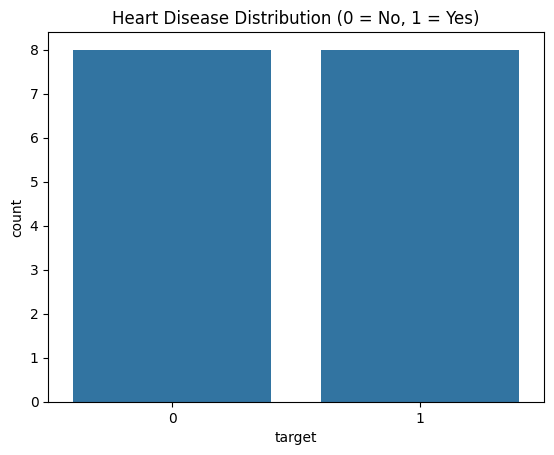

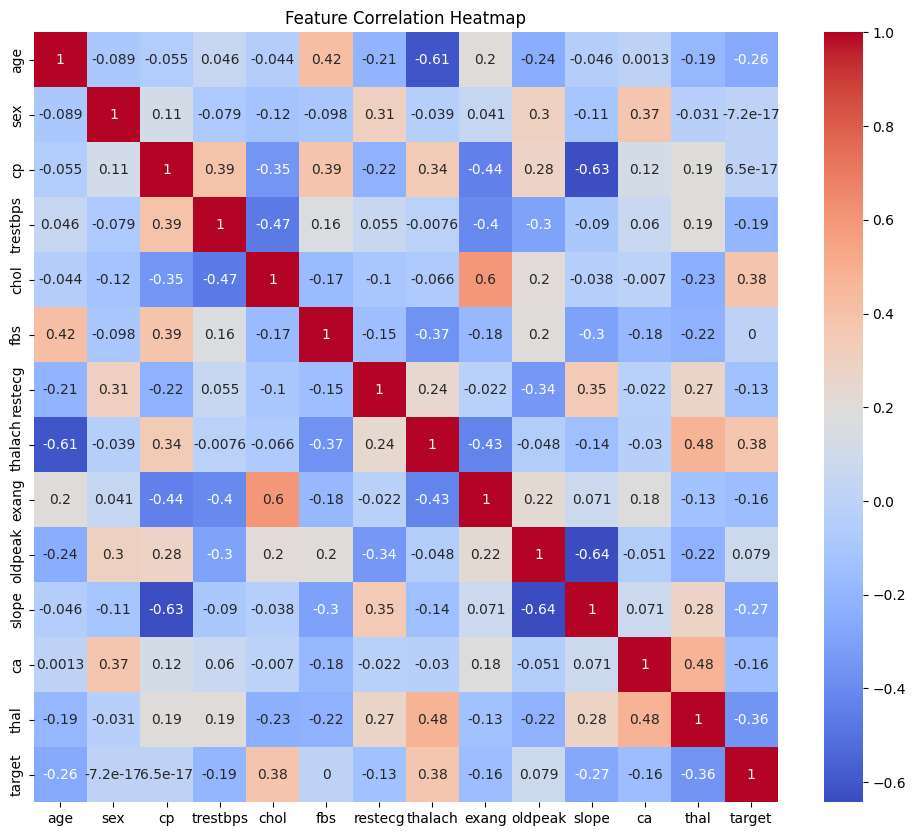

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Class distribution chart
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

# 🔥 Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()



In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)  # Features (input)
y = df['target']               # Target (output)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Show target distribution in training set
print("Training set class distribution:\n", y_train.value_counts())


Training set class distribution:
 target
1    6
0    6
Name: count, dtype: int64


In [8]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict target values for test data
y_pred = model.predict(X_test)

# Evaluate performance
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.75

📊 Confusion Matrix:
 [[1 1]
 [0 2]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



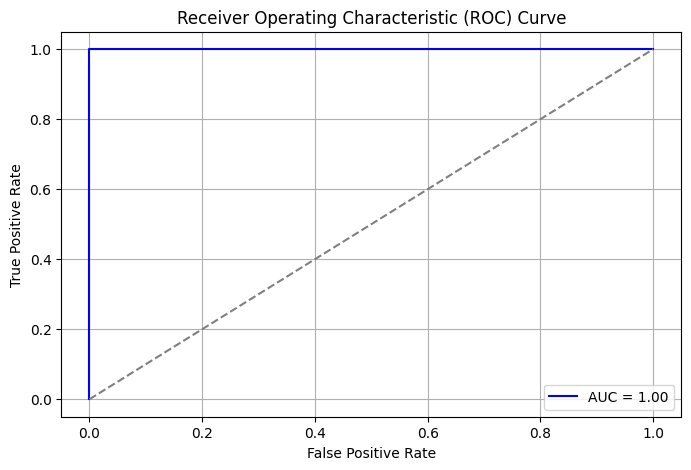

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# ROC values
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
